<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_1_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_NLP_(%D0%AF%D0%B7%D1%8B%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%2C_Bag_of_Words).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Глава 1: Введение в NLP

#Языковые модели

#### Введение

Языковые модели (ЯМ) являются основой для решения множества задач обработки естественного языка (NLP), включая машинный перевод, анализ тональности, генерацию текста и многие другие. Языковая модель — это вероятностная модель, которая определяет, насколько вероятно появление последовательности слов в языке.

#### 1. Определение языковой модели

Языковая модель $P(w_1, w_2, \ldots, w_n)$ оценивает вероятность появления последовательности слов $w_1, w_2, \ldots, w_n$. Основная цель языковой модели — предсказать следующее слово в предложении, основываясь на предыдущих словах.

##### Формула

Вероятность последовательности слов можно выразить через условные вероятности:

$$
P(w_1, w_2, \ldots, w_n) = P(w_1) \cdot P(w_2 | w_1) \cdot P(w_3 | w_1, w_2) \cdots P(w_n | w_1, w_2, \ldots, w_{n-1})
$$

Где:
- $P(w_i | w_1, w_2, \ldots, w_{i-1})$ — вероятность появления слова $w_i$, учитывая предыдущие слова.

#### 2. Типы языковых моделей

Языковые модели можно классифицировать на две основные категории:

1. **Неглубокие модели** (например, n-граммные модели)
2. **Глубокие модели** (например, рекуррентные нейронные сети, трансформеры)

##### 2.1 N-граммные модели

N-граммная модель основывается на предположении, что вероятность появления слова зависит только от $n-1$ предыдущих слов. Это называется предположением Маркова.

**Формула для n-граммной модели:**

$$
P(w_n | w_1, w_2, \ldots, w_{n-1}) \approx P(w_n | w_{n-n+1}, w_{n-n+2}, \ldots, w_{n-1})
$$

**Пример:**

Для биграммной модели (где $n=2$):

$$
P(w_n | w_{n-1}) = \frac{C(w_{n-1}, w_n)}{C(w_{n-1})}
$$

где $C(x)$ — количество раз, когда последовательность $x$ появляется в обучающей выборке.

##### 2.2 Глубокие модели

Глубокие модели, такие как рекуррентные нейронные сети (RNN) и трансформеры, используют нейронные сети для обработки последовательностей слов.

**Формула для RNN:**

$$
h_t = f(W_h h_{t-1} + W_x x_t + b_h)
$$
$$
y_t = W_y h_t + b_y
$$

где:
- $h_t$ — скрытое состояние в момент времени $t$,
- $x_t$ — входное слово в момент времени $t$,
- $f$ — функция активации (например, tanh или ReLU),
- $W_h, W_x, W_y$ — весовые матрицы,
- $b_h, b_y$ — смещения.

#### 3. Оценка языковых моделей

Для оценки языковых моделей часто используются метрики, такие как перплексия и точность.

##### 3.1 Перплексия

Перплексия (PPL) — это мера того, насколько хорошо языковая модель предсказывает последовательность слов. Она определяется как:

$$
PPL = 2^{H(P)}
$$

где $H(P)$ — средняя кросс-энтропия модели. Она показывает, сколько "возможных" слов модель рассматривает на каждом шаге предсказания.

##### 3.2 Кросс-энтропия

Кросс-энтропия между распределениями вероятностей $P$ и $Q$ определяется как:

$$
H(P, Q) = -\sum_{x} P(x) \log Q(x)
$$

#### 4. Примеры

Рассмотрим пример с использованием биграммной модели. Пусть у нас есть следующий текст:

> "Я люблю изучать языки. Я люблю программирование."

##### 4.1 Подсчет вероятностей

Сначала подсчитаем количество биграмм:

- $C(\text{"Я"}, \text{"люблю"}) = 2$
- $C(\text{"люблю"}, \text{"изучать"}) = 1$
- $C(\text{"изучать"}, \text{"языки"}) = 1$
- $C(\text{"языки"}, \text{"."}) = 1$
- $C(\text{"Я"}, \text{"программирование"}) = 1$

Общее количество биграмм, начинающихся с "Я":

$$
C(\text{"Я"}) = 3
$$

Теперь можем рассчитать вероятности:

$$
P(\text{"люблю"} | \text{"Я"}) = \frac{C(\text{"Я"}, \text{"люблю"})}{C(\text{"Я"})} = \frac{2}{3}
$$
$$
P(\text{"изучать"} | \text{"люблю"}) = \frac{C(\text{"люблю"}, \text{"изучать"})}{C(\text{"люблю"})} = \frac{1}{2}
$$

##### 4.2 Пример с использованием кросс-энтропии

Предположим, у нас есть распределение вероятностей для некоторого слова:

- Модель предсказывает $P(w) = [0.7, 0.2, 0.1]$.

А реальное распределение:

- $P'(w) = [1, 0, 0]$.

Кросс-энтропия будет вычисляться так:

$$
H(P, P') = -[1 \cdot \log(0.7) + 0 \cdot \log(0.2) + 0 \cdot \log(0.1)] \approx 0.3567
$$

#### Заключение

Языковые модели играют ключевую роль в задачах NLP. От простых n-граммных моделей до сложных архитектур, таких как трансформеры, каждая модель имеет свои преимущества и недостатки. Понимание вероятностей, оценок и математических основ этих моделей критично для эффективного решения задач в области обработки естественного языка.

### Пример применения

**Задача:** Предсказать следующее слово после фразы "Я люблю".

**Решение:**
1. Используем биграммные вероятности:
   - $P(\text{"программирование"} | \text{"люблю"}) = \frac{1}{2}$
   - $P(\text{"изучать"} | \text{"люблю"}) = \frac{1}{2}$

2. Следовательно, следующее слово может быть либо "программирование", либо "изучать" с равными шансами.

Таким образом, языковые модели обеспечивают мощный инструмент для анализа и генерации текста в естественном языке, что позволяет решать множество практических задач.




### Примеры по языковым моделям в NLP

#### Пример 1: B-Граммная Модель

**Задача:** Предсказать следующее слово после фразы "Я люблю" с использованием биграммной модели.

**Данные:**

Пусть у нас есть следующий текст:

```
"Я люблю программирование. Я люблю изучать языки."
```

**Шаги:**

1. **Составляем биграммы:**
   - Биграммы: ("Я", "люблю"), ("люблю", "программирование"), ("Я", "люблю"), ("люблю", "изучать"), ("изучать", "языки").
   
2. **Подсчитываем частоты:**
   - $C(\text{"Я"}, \text{"люблю"}) = 2$
   - $C(\text{"люблю"}, \text{"программирование"}) = 1$
   - $C(\text{"люблю"}, \text{"изучать"}) = 1$
   - $C(\text{"изучать"}, \text{"языки"}) = 1$

3. **Общее количество биграмм, начинающихся с "Я":**
   - $C(\text{"Я"}) = 2$

4. **Вычисляем вероятности:**
   - $P(\text{"люблю"} | \text{"Я"}) = \frac{C(\text{"Я"}, \text{"люблю"})}{C(\text{"Я"})} = \frac{2}{2} = 1$
   - $P(\text{"программирование"} | \text{"люблю"}) = \frac{C(\text{"люблю"}, \text{"программирование"})}{C(\text{"люблю"})} = \frac{1}{2}$
   - $P(\text{"изучать"} | \text{"люблю"}) = \frac{C(\text{"люблю"}, \text{"изучать"})}{C(\text{"люблю"})} = \frac{1}{2}$

**Ответ:** Следующее слово может быть "программирование" или "изучать" с вероятностями $0.5$.



#### Пример 2: Кросс-Энтропия

**Задача:** Оценить качество предсказания языковой модели.

**Данные:**

Пусть у нас есть предсказанные вероятности для следующего слова $P(w)$ и истинные вероятности $P'(w)$:

- Предсказанные вероятности: $P(w) = [0.7, 0.2, 0.1]$ для слов [A, B, C].
- Истинные вероятности: $P'(w) = [1, 0, 0]$.

**Шаги:**

1. **Вычисляем кросс-энтропию:**
   $$
   H(P, P') = -\sum_{i=1}^{N} P'(w_i) \log P(w_i)
   $$
   Подставляем значения:
   $$
   H(P, P') = -\left(1 \cdot \log(0.7) + 0 \cdot \log(0.2) + 0 \cdot \log(0.1)\right)
   $$
   $$
   H(P, P') = -\log(0.7) \approx 0.3567
   $$

**Ответ:** Кросс-энтропия $H(P, P') \approx 0.3567$.



#### Пример 3: Перплексия

**Задача:** Рассчитать перплексию языковой модели.

**Данные:**

Предположим, что у нас есть последовательность из 3 слов, и языковая модель предсказывает их с следующими вероятностями:

- $P(w_1) = 0.4$
- $P(w_2) = 0.3$
- $P(w_3) = 0.1$

**Шаги:**

1. **Вычисляем среднюю кросс-энтропию:**
   $$
   H(P) = -\frac{1}{N} \sum_{i=1}^{N} \log P(w_i)
   $$
   Подставляем значения:
   $$
   H(P) = -\frac{1}{3} \left(\log(0.4) + \log(0.3) + \log(0.1)\right)
   $$
   Вычисляем:
   $$
   H(P) \approx -\frac{1}{3} (-0.9163 - 1.2040 - 2.3026) \approx 1.141
   $$

2. **Расчет перплексии:**
   $$
   PPL = 2^{H(P)} = 2^{1.141} \approx 2.25
   $$

**Ответ:** Перплексия $PPL \approx 2.25$.



Эти примеры иллюстрируют, как работают языковые модели, оцениваются их предсказания и как можно использовать статистические метрики для анализа их качества.





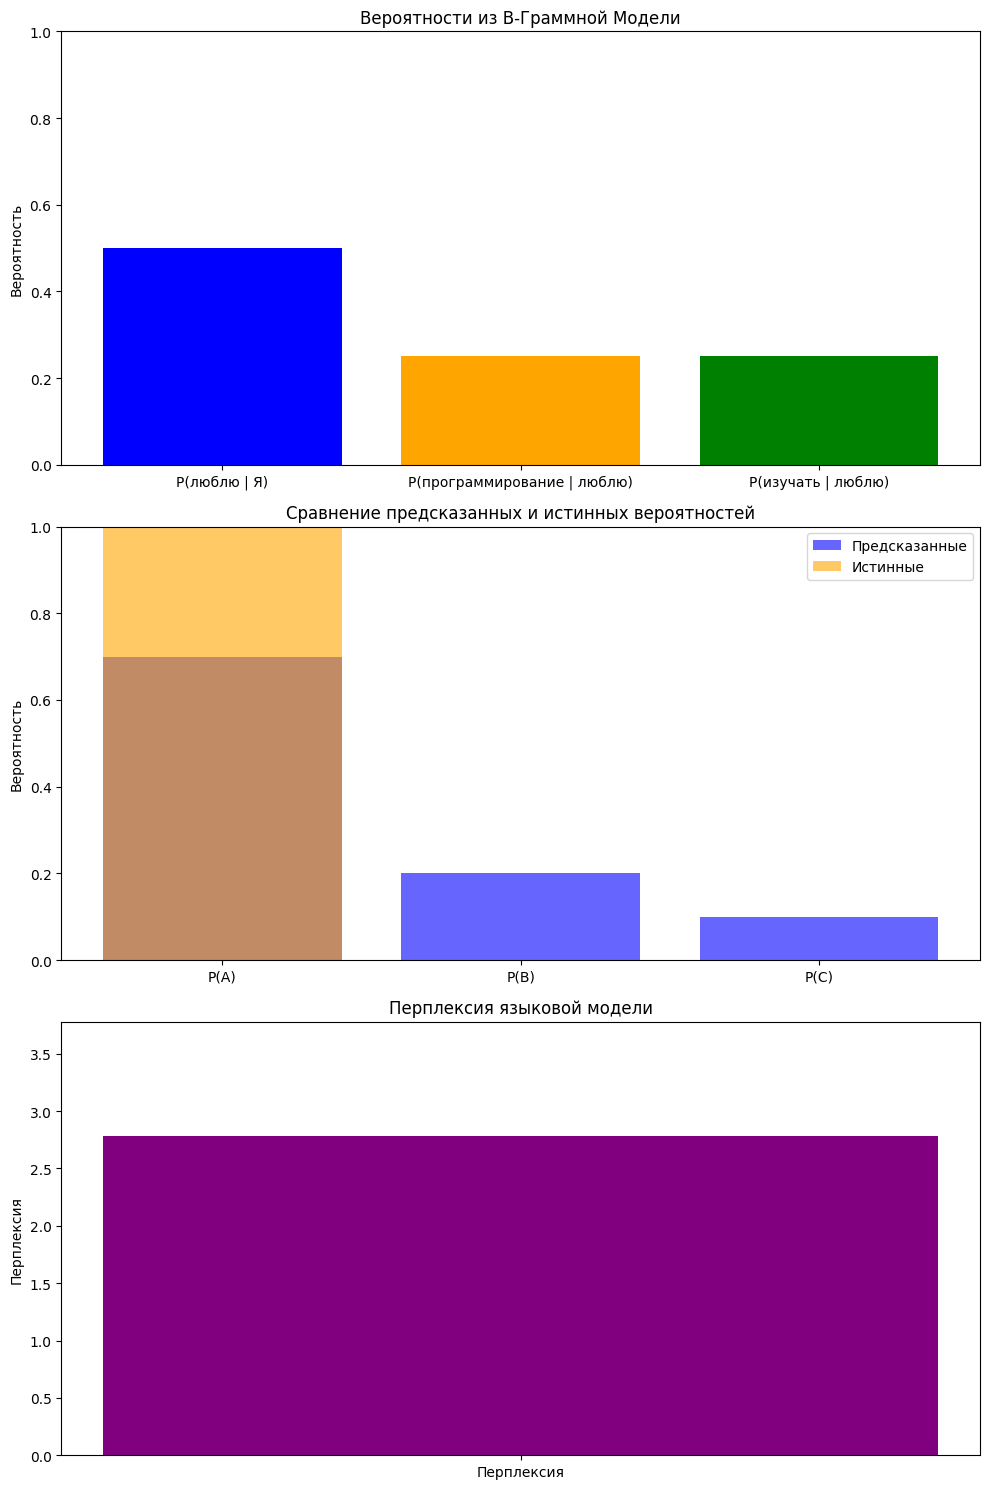

(0.35667494393873245, 2.7784550036273306, 0.5, 0.25, 0.25)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Пример 1: B-Граммная Модель
# Данные
text = ["Я", "люблю", "программирование", "Я", "люблю", "изучать", "языки"]

# Подсчет частот биграмм
bigram_counts = {}
for i in range(len(text) - 1):
    bigram = (text[i], text[i + 1])
    if bigram in bigram_counts:
        bigram_counts[bigram] += 1
    else:
        bigram_counts[bigram] = 1

# Общее количество биграмм, начинающихся с "Я"
count_y_love = bigram_counts.get(("Я", "люблю"), 0)
count_y = sum(bigram_counts.get(("Я", w), 0) for w in text)

# Вероятности
P_love_given_Y = count_y_love / count_y
P_programming_given_love = bigram_counts.get(("люблю", "программирование"), 0) / count_y
P_study_given_love = bigram_counts.get(("люблю", "изучать"), 0) / count_y

# Пример 2: Кросс-Энтропия
predicted_probs = np.array([0.7, 0.2, 0.1])  # Предсказанные вероятности
true_probs = np.array([1, 0, 0])  # Истинные вероятности

# Кросс-энтропия
cross_entropy = -np.sum(true_probs * np.log(predicted_probs))

# Пример 3: Перплексия
# Вероятности для 3 слов
probabilities = np.array([0.4, 0.3, 0.1])
# Средняя кросс-энтропия
average_cross_entropy = -np.mean(np.log(probabilities))
# Перплексия
perplexity = 2 ** average_cross_entropy

# Визуализация результатов
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Пример 1
axs[0].bar(["P(люблю | Я)", "P(программирование | люблю)", "P(изучать | люблю)"],
           [P_love_given_Y, P_programming_given_love, P_study_given_love],
           color=['blue', 'orange', 'green'])
axs[0].set_ylim(0, 1)
axs[0].set_ylabel('Вероятность')
axs[0].set_title('Вероятности из B-Граммной Модели')

# Пример 2
axs[1].bar(["P(A)", "P(B)", "P(C)"], predicted_probs, color='blue', alpha=0.6, label='Предсказанные')
axs[1].bar(["P(A)", "P(B)", "P(C)"], true_probs, color='orange', alpha=0.6, label='Истинные')
axs[1].set_ylim(0, 1)
axs[1].set_ylabel('Вероятность')
axs[1].set_title('Сравнение предсказанных и истинных вероятностей')
axs[1].legend()

# Пример 3
axs[2].bar(['Перплексия'], [perplexity], color='purple')
axs[2].set_ylim(0, perplexity + 1)
axs[2].set_ylabel('Перплексия')
axs[2].set_title('Перплексия языковой модели')

plt.tight_layout()
plt.show()

# Вывод значений
cross_entropy, perplexity, P_love_given_Y, P_programming_given_love, P_study_given_love

##2. Bag of Words (Мешок слов)

**Мешок слов** (Bag of Words, BoW) — это один из базовых подходов для представления текстовых данных в виде числовых векторов, который используется в задачах обработки естественного языка (NLP). Несмотря на свою простоту, метод BoW является основой для многих современных моделей и широко используется для текстовой классификации, кластеризации и других задач.

### Основная идея "Мешка слов"

Подход "Мешка слов" подразумевает, что текст (например, предложение или документ) представляется как неупорядоченный набор слов, при этом не учитывается порядок слов и их грамматическая структура. Основное внимание уделяется количеству вхождений каждого слова.

### Шаги для построения модели "Мешка слов"

1. **Сбор данных**: Собирается текстовый корпус, который будет использоваться для построения словаря.
2. **Предобработка текста**: Применяются методы предобработки, такие как приведение слов к нижнему регистру, удаление стоп-слов, лемматизация или стемминг.
3. **Создание словаря**: Формируется словарь (vocabulary) — это список уникальных слов, встречающихся в корпусе текстов.
4. **Построение вектора**: Для каждого документа строится вектор, где каждый элемент соответствует количеству вхождений определенного слова из словаря в данный документ.

### Математическая формализация

Пусть у нас есть корпус текстов $D = \{d_1, d_2, \dots, d_n\}$, где $n$ — это количество документов.

#### 1. **Модель "Мешка слов"**

Сначала формируется словарь $V = \{w_1, w_2, \dots, w_m\}$, где $m$ — это количество уникальных слов во всем корпусе. Для каждого документа $d_i$ строится вектор размерности $m$, где каждый элемент вектора соответствует количеству вхождений слова $w_j$ из словаря в этот документ. В результате, каждый документ $d_i$ представляется как вектор $v_i = (x_1, x_2, \dots, x_m)$, где:

$$
x_j = \text{count}(w_j, d_i)
$$

где $\text{count}(w_j, d_i)$ — это количество раз, которое слово $w_j$ встречается в документе $d_i$.

#### Пример:

Допустим, у нас есть следующие три документа:

- $d_1 = \text{"кошка сидит на ковре"}$
- $d_2 = \text{"собака лежит на полу"}$
- $d_3 = \text{"кошка и собака играют"}$

1. Формируем словарь:
   $V = \{\text{"кошка"}, \text{"сидит"}, \text{"на"}, \text{"ковре"}, \text{"собака"}, \text{"лежит"}, \text{"полу"}, \text{"и"}, \text{"играют"}\}$

2. Для каждого документа строим вектор:

$$
v_1 = (1, 1, 1, 1, 0, 0, 0, 0, 0)
$$
$$
v_2 = (0, 0, 1, 0, 1, 1, 1, 0, 0)
$$
$$
v_3 = (1, 0, 0, 0, 1, 0, 0, 1, 1)
$$

### 2. **Взвешенный подход: TF-IDF**

Вместо того чтобы просто считать количество вхождений слов, можно использовать взвешенные значения, такие как **TF-IDF** (Term Frequency-Inverse Document Frequency). Этот метод учитывает не только частоту слова в конкретном документе, но и то, как часто это слово встречается в других документах.

#### Формулы TF-IDF:

- **TF** (Term Frequency): частота слова $w_j$ в документе $d_i$:

$$
TF(w_j, d_i) = \frac{\text{count}(w_j, d_i)}{\sum_{w_k \in d_i} \text{count}(w_k, d_i)}
$$

- **IDF** (Inverse Document Frequency): обратная частота документа для слова $w_j$:

$$
IDF(w_j, D) = \log \frac{|D|}{|\{d_i \in D : w_j \in d_i\}|}
$$

где $|D|$ — общее количество документов, а $|\{d_i \in D : w_j \in d_i\}|$ — количество документов, содержащих слово $w_j$.

- **TF-IDF**:

$$
TFIDF(w_j, d_i, D) = TF(w_j, d_i) \cdot IDF(w_j, D)
$$

Этот метод помогает уменьшить вес часто встречающихся слов (например, "на", "и") и увеличить вес редких, но значимых слов.

### Визуализация данных

Визуализировать результаты "Мешка слов" можно с помощью матриц (например, heatmap), где строки будут соответствовать документам, а столбцы — словам из словаря.

### Градиентный спуск для оптимизации

Если рассматривать BoW как часть модели машинного обучения, то можно использовать алгоритмы оптимизации, такие как градиентный спуск, для настройки весов слов в зависимости от задачи.

#### Градиентный спуск

Для минимизации функции потерь в задачах классификации или регрессии можно применить метод градиентного спуска. Рассмотрим функцию потерь $J(\theta)$, где $\theta$ — это параметры модели (веса слов).

Обновление параметров производится по правилу:

$$
\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)
$$

где $\alpha$ — это шаг обучения (learning rate), а $\frac{\partial}{\partial \theta_j} J(\theta)$ — градиент функции потерь по параметру $\theta_j$.

Пример функции потерь для задачи бинарной классификации:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

где $h_\theta(x)$ — это сигмоидная функция, описывающая вероятность:

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

Градиенты для обновления весов слов:

$$
\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
$$

### Пример решения задачи с BoW

Предположим, у нас есть два документа:

- $d_1 = \text{"кошка на ковре"}$
- $d_2 = \text{"собака на полу"}$

1. Формируем словарь: $V = \{\text{"кошка"}, \text{"собака"}, \text{"на"}, \text{"ковре"}, \text{"полу"}\}$.
2. Строим векторы:
   $$
   v_1 = (1, 0, 1, 1, 0)
   $$
   $$
   v_2 = (0, 1, 1, 0, 1)
   $$
3. Вычисляем косинусную схожесть между документами:

Косинусная схожесть:
$$
\cos(\theta) = \frac{v_1 \cdot v_2}{\|v_1\| \|v_2\|}
$$

Векторное произведение:
$$
v_1 \cdot v_2 = (1 \cdot 0) + (0 \cdot 1) + (1 \cdot 1) + (1 \cdot 0) + (0 \cdot 1) = 1
$$

Нормы векторов:
$$
\|v_1\| = \sqrt{1^2 + 0^2 + 1^2 + 1^2 + 0^2} = \sqrt{3}
$$
$$
\|v_2\| = \sqrt{0^2 + 1^2 + 1^2 + 0^2 + 1^2} = \sqrt{3}
$$

Косинусная схожесть:
$$
\cos(\theta) = \frac{1}{\sqrt{3} \cdot \sqrt{3}} = \frac{1}{3}


$$

### Заключение

Модель "Мешка слов" — это простой и эффективный метод представления текста в виде числовых векторов, который широко используется в задачах классификации и кластеризации текста. Этот подход можно усовершенствовать с помощью TF-IDF и использовать для построения более сложных моделей, таких как нейронные сети.









### Пример 1: Создание векторов на основе модели "Мешок слов"

**Условие:**

У нас есть три документа:

1. $d_1 = \text{"кошка сидит на ковре"}$
2. $d_2 = \text{"собака лежит на полу"}$
3. $d_3 = \text{"кошка и собака играют"}$

Построим векторы для этих документов с использованием модели "Мешок слов" (BoW).

**Решение:**

**Шаг 1: Формируем словарь**

Из всех документов выделяем уникальные слова для создания словаря:

- $d_1 = \text{"кошка сидит на ковре"}$
- $d_2 = \text{"собака лежит на полу"}$
- $d_3 = \text{"кошка и собака играют"}$

Уникальные слова:  
**Словарь $V = \{ \text{"кошка"}, \text{"сидит"}, \text{"на"}, \text{"ковре"}, \text{"собака"}, \text{"лежит"}, \text{"полу"}, \text{"и"}, \text{"играют"} \}$**

**Шаг 2: Строим векторы для каждого документа**

Теперь для каждого документа строим вектор, где каждая позиция соответствует количеству вхождений слова из словаря.

1. Вектор для $d_1$:

$$
v_1 = (1, 1, 1, 1, 0, 0, 0, 0, 0)
$$

Пояснение: Слово "кошка" встречается 1 раз, "сидит" — 1 раз, "на" — 1 раз, "ковре" — 1 раз. Другие слова из словаря в этом документе не встречаются.

2. Вектор для $d_2$:

$$
v_2 = (0, 0, 1, 0, 1, 1, 1, 0, 0)
$$

Пояснение: Слово "на" встречается 1 раз, "собака" — 1 раз, "лежит" — 1 раз, "полу" — 1 раз.

3. Вектор для $d_3$:

$$
v_3 = (1, 0, 0, 0, 1, 0, 0, 1, 1)
$$

Пояснение: Слово "кошка" встречается 1 раз, "собака" — 1 раз, "и" — 1 раз, "играют" — 1 раз.

**Итоговые векторы:**

- $d_1 = (1, 1, 1, 1, 0, 0, 0, 0, 0)$
- $d_2 = (0, 0, 1, 0, 1, 1, 1, 0, 0)$
- $d_3 = (1, 0, 0, 0, 1, 0, 0, 1, 1)$

### Пример 2: Вычисление TF-IDF для документа

**Условие:**

Рассмотрим следующие два документа:

1. $d_1 = \text{"кот спит на ковре"}$
2. $d_2 = \text{"кот ест рыбу"}$

Формируем словарь и вычисляем TF-IDF для каждого слова из документа $d_1$.

**Решение:**

**Шаг 1: Формируем словарь**

Уникальные слова из документов:

$V = \{ \text{"кот"}, \text{"спит"}, \text{"на"}, \text{"ковре"}, \text{"ест"}, \text{"рыбу"} \}$

**Шаг 2: Рассчитываем TF для документа $d_1$**

Частота слова $w_j$ в документе $d_1$ рассчитывается по формуле:

$$
TF(w_j, d_1) = \frac{\text{count}(w_j, d_1)}{\sum_{w_k \in d_1} \text{count}(w_k, d_1)}
$$

В документе $d_1$ четыре слова: "кот", "спит", "на", "ковре".

Частоты:

- $TF(\text{"кот"}, d_1) = \frac{1}{4} = 0.25$
- $TF(\text{"спит"}, d_1) = \frac{1}{4} = 0.25$
- $TF(\text{"на"}, d_1) = \frac{1}{4} = 0.25$
- $TF(\text{"ковре"}, d_1) = \frac{1}{4} = 0.25$

**Шаг 3: Рассчитываем IDF для всех слов**

IDF для каждого слова вычисляется по формуле:

$$
IDF(w_j, D) = \log \frac{|D|}{|\{d_i \in D : w_j \in d_i\}|}
$$

Где $|D| = 2$ — это количество документов.

Для каждого слова:

- $IDF(\text{"кот"}) = \log \frac{2}{2} = 0$
- $IDF(\text{"спит"}) = \log \frac{2}{1} = \log 2 = 0.693$
- $IDF(\text{"на"}) = \log \frac{2}{1} = \log 2 = 0.693$
- $IDF(\text{"ковре"}) = \log \frac{2}{1} = \log 2 = 0.693$

**Шаг 4: Рассчитываем TF-IDF для документа $d_1$**

Теперь вычисляем TF-IDF по формуле:

$$
TFIDF(w_j, d_1, D) = TF(w_j, d_1) \cdot IDF(w_j, D)
$$

Результаты для каждого слова:

- $TFIDF(\text{"кот"}) = 0.25 \cdot 0 = 0$
- $TFIDF(\text{"спит"}) = 0.25 \cdot 0.693 = 0.173$
- $TFIDF(\text{"на"}) = 0.25 \cdot 0.693 = 0.173$
- $TFIDF(\text{"ковре"}) = 0.25 \cdot 0.693 = 0.173$

Итоговые значения TF-IDF для документа $d_1$: $(0, 0.173, 0.173, 0.173)$.

### Пример 3: Косинусное сходство между двумя документами

**Условие:**

Даны два документа:

- $d_1 = \text{"кошка на ковре"}$
- $d_2 = \text{"собака на ковре"}$

Нужно вычислить косинусное сходство между ними.

**Решение:**

**Шаг 1: Формируем словарь**

Уникальные слова: $V = \{\text{"кошка"}, \text{"на"}, \text{"ковре"}, \text{"собака"}\}$.

**Шаг 2: Строим векторы для документов**

1. Вектор для $d_1$:

$$
v_1 = (1, 1, 1, 0)
$$

2. Вектор для $d_2$:

$$
v_2 = (0, 1, 1, 1)
$$

**Шаг 3: Рассчитываем косинусное сходство**

Косинусное сходство между двумя векторами вычисляется по формуле:

$$
\cos(\theta) = \frac{v_1 \cdot v_2}{\|v_1\| \|v_2\|}
$$

- Векторное произведение:

$$
v_1 \cdot v_2 = (1 \cdot 0) + (1 \cdot 1) + (1 \cdot 1) + (0 \cdot 1) = 2
$$

- Нормы векторов:

$$
\|v_1\| = \sqrt{1^2 + 1^2 + 1^2 + 0^2} = \sqrt{3}
$$
$$
\|v_2\| = \sqrt{0^2 + 1^2 + 1^2 + 1^2} = \sqrt{3}
$$

- Косинусное сходство:

$$
\cos(\theta) = \frac{2}{\sqrt{3} \cdot \sqrt{3}} = \frac{2}{3}
$$

**Ответ:**

Косинусное сходство между двумя документами равно $\frac{2}{3} \approx 0.67$.



Эти примеры демонстрируют три различных аспекта использования модели "Мешок слов" в NLP: создание векторов, вычисление TF-IDF, и косинусное сходство для сравнения текстов.




Приведем реализации предложенных примеров на Python с использованием библиотек `numpy` и `matplotlib` для визуализации.

### Реализация примеров



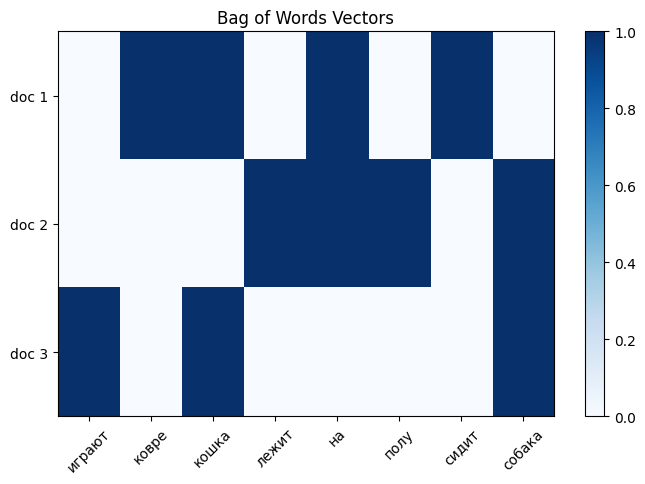

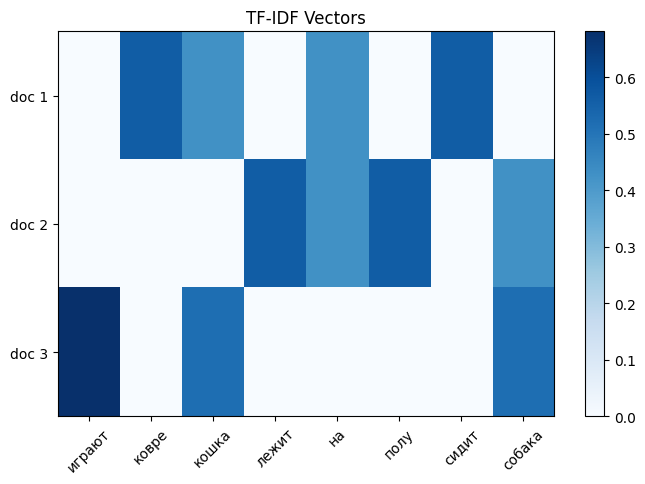

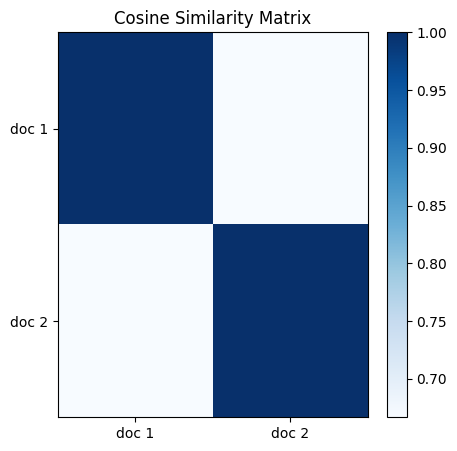

Косинусное сходство: 0.6666666666666669


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Пример 1: Создание векторов на основе модели "Мешок слов"
documents = [
    "кошка сидит на ковре",
    "собака лежит на полу",
    "кошка и собака играют"
]

# Создание векторов "Мешок слов"
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents).toarray()
vocab = vectorizer.get_feature_names_out()

# Визуализация
plt.figure(figsize=(8, 5))
plt.title('Bag of Words Vectors')
plt.imshow(X, cmap='Blues', aspect='auto')
plt.colorbar()
plt.xticks(range(len(vocab)), vocab, rotation=45)
plt.yticks(range(len(documents)), [f'doc {i+1}' for i in range(len(documents))])
plt.grid(False)
plt.show()

# Пример 2: Вычисление TF-IDF для документа
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents).toarray()

# Визуализация TF-IDF
plt.figure(figsize=(8, 5))
plt.title('TF-IDF Vectors')
plt.imshow(tfidf_matrix, cmap='Blues', aspect='auto')
plt.colorbar()
plt.xticks(range(len(tfidf_vectorizer.get_feature_names_out())), tfidf_vectorizer.get_feature_names_out(), rotation=45)
plt.yticks(range(len(documents)), [f'doc {i+1}' for i in range(len(documents))])
plt.grid(False)
plt.show()

# Пример 3: Косинусное сходство между двумя документами
doc1 = ["кошка на ковре"]
doc2 = ["собака на ковре"]

# Создание векторов для косинусного сходства
cosine_vectorizer = CountVectorizer()
cosine_matrix = cosine_vectorizer.fit_transform(doc1 + doc2).toarray()

# Вычисление косинусного сходства
cos_sim = cosine_similarity(cosine_matrix)

# Визуализация косинусного сходства
plt.figure(figsize=(5, 5))
plt.title('Cosine Similarity Matrix')
plt.imshow(cos_sim, cmap='Blues', aspect='auto')
plt.colorbar()
plt.xticks([0, 1], ['doc 1', 'doc 2'])
plt.yticks([0, 1], ['doc 1', 'doc 2'])
plt.grid(False)
plt.show()

print("Косинусное сходство:", cos_sim[0, 1])

### Вопросы для самопроверки
###1. Языковые модели
1. Что такое языковая модель (Language Model) в задачах NLP?
2. В чем разница между униграммной, биграммной и триграммной моделями?
3. Как рассчитываются вероятности слов в модели на основе N-грамм?
4. Что такое сглаживание Лапласа и как оно используется в языковых моделях?
5. Какова основная идея языковых моделей на основе скрытых марковских моделей (HMM)?
6. Как применяется кросс-энтропия для оценки качества языковой модели?
7. Что такое перплексия и как она интерпретируется в контексте языковых моделей?
8. В чем разница между вероятностными языковыми моделями и моделями на основе нейронных сетей?
9. Как работает модель Word2Vec и для чего она используется в NLP?
10. Какие существуют методы обучения моделей Word2Vec (Skip-Gram и CBOW)?
11. Что такое Embedding Layer и как он используется в нейросетевых языковых моделях?
12. Как трансформеры (Transformer) применяются в современных языковых моделях?
13. Какие ключевые компоненты архитектуры трансформера?
14. Чем внимание (attention) отличается от механизма self-attention?
15. Как работает механизм masked attention в моделях типа GPT?






###2. Bag of Words

1. Что такое модель "Мешок слов" (Bag of Words)?
2. Каковы основные шаги при реализации модели "Мешок слов"?
3. В чем разница между "Мешком слов" и "TF-IDF"?
4. Как рассчитывается частота слова (Term Frequency, TF) в документе?
5. Что такое обратная частота документа (Inverse Document Frequency, IDF)?
6. Какова формула для расчета TF-IDF?
7. В чем заключается принцип работы метода косинусного сходства?
8. Каковы преимущества и недостатки модели "Мешок слов"?
9. Как модель "Мешок слов" обрабатывает порядок слов в тексте?
10. Какие методы можно использовать для визуализации векторов "Мешок слов"?
11. Как можно улучшить результаты классификации с использованием модели "Мешок слов"?
12. Как избежать влияния часто встречающихся слов на результаты модели?
13. Что такое стемминг и лемматизация, и как они связаны с моделью "Мешок слов"?
14. Какова роль препроцессинга текста в модели "Мешок слов"?
15. В каких случаях использование модели "Мешок слов" может быть нецелесообразным?


## Задачи для самостоятельной работы
###1. Языковые модели
1. Реализуйте униграммную языковую модель для предсказания следующего слова по тексту.
2. Реализуйте биграммную языковую модель для предсказания следующего слова на основе предыдущего.
3. Постройте триграммную модель на основе текста и вычислите вероятность следующего слова.
4. Добавьте сглаживание Лапласа к вашей модели N-грамм.
5. Оцените качество N-граммной модели на тестовых данных с использованием перплексии.
6. Примените скрытые марковские модели для задачи части речи (POS-tagging).
7. Рассчитайте кросс-энтропию для предсказания модели на основе N-грамм на тестовом наборе данных.
8. Реализуйте модель Word2Vec на небольшом корпусе текста с использованием CBOW.
9. Реализуйте модель Word2Vec с использованием метода Skip-Gram и визуализируйте вектора слов.
10. Сравните представления слов, обученные с помощью Word2Vec и N-граммных моделей.
11. Постройте модель на основе Recurrent Neural Network (RNN) для языковой задачи.
12. Реализуйте двунаправленную LSTM (Bidirectional LSTM) для предсказания последовательности слов.
13. Реализуйте модель с архитектурой трансформера для задачи предсказания следующего слова.
14. Обучите модель BERT на небольшом корпусе данных и протестируйте её на задаче классификации текста.
15. Используйте предобученную модель GPT-2 для генерации текста на основе стартовой фразы.
16. Реализуйте нейронную языковую модель, использующую GRU для текстовых данных.
17. Обучите модель на основе attention для задачи машинного перевода.
18. Примените модели на основе трансформера для задачи извлечения именованных сущностей (NER).
19. Постройте языковую модель на основе BERT для задачи вопросно-ответных систем.
20. Реализуйте механизм seq2seq с attention для перевода текста с одного языка на другой.
21. Постройте классификационную модель для анализа настроений с использованием предобученной BERT.
22. Используйте алгоритм Word2Vec для вычисления текстовых похожестей.
23. Реализуйте модель классификации текстов на основе fastText.
24. Примените метод Doc2Vec для задачи тематической классификации документов.
25. Используйте BPE токенизацию для уменьшения размера словаря и улучшения предсказаний модели.
26. Примените языковую модель для оценки семантического сходства двух текстов.
27. Оцените качество модели GPT-2 с использованием BLEU и ROUGE метрик для текста.
28. Реализуйте модель на основе языковых моделей LDA для тематического моделирования текстов.
29. Обучите языковую модель с использованием техник ранней остановки (early stopping) и регуляризации.
30. Исследуйте влияние размера корпуса на качество предсказаний языковых моделей (N-грамм, LSTM, BERT).



###2. Bag of Words

1. Создайте векторы "Мешок слов" для набора текстовых документов, содержащих различные фразы.
2. Реализуйте расчет TF и IDF для нескольких текстов, используя формулы.
3. Постройте график, иллюстрирующий значения TF-IDF для выбранных слов в документе.
4. Используя библиотеку `sklearn`, сравните векторы "Мешок слов" с TF-IDF для одного и того же набора документов.
5. Реализуйте функцию для подсчета косинусного сходства между двумя текстами.
6. Создайте функцию, которая будет удалять стоп-слова из текста перед созданием векторов.
7. Исследуйте, как изменение размера корпуса документов влияет на значения TF-IDF.
8. Сравните векторы "Мешок слов" и TF-IDF на различных наборах данных и оцените их качество классификации.
9. Примените модель "Мешок слов" для задачи классификации текста (например, новостные статьи).
10. Используйте "Мешок слов" для создания модели для анализа настроений (например, положительные и отрицательные отзывы).
11. Разработайте визуализацию векторов "Мешок слов" для набора документов с использованием библиотеки `matplotlib`.
12. Сравните результаты классификации, используя разные методы векторизации (например, "Мешок слов", TF-IDF и Word2Vec).
13. Исследуйте, как удаление редких слов из словаря влияет на производительность модели.
14. Реализуйте систему рекомендаций на основе косинусного сходства векторов "Мешок слов".
15. Используйте стемминг и лемматизацию, чтобы улучшить качество векторов "Мешок слов".
16. Исследуйте, как изменение порядка слов в тексте влияет на косинусное сходство.
17. Сравните векторы "Мешок слов" с методами векторизации на основе нейронных сетей (например, Doc2Vec).
18. Создайте несколько наборов текстов на разных языках и проверьте работу модели "Мешок слов" для каждого языка.
19. Реализуйте модель, которая будет классифицировать тексты на основе их векторов "Мешок слов".
20. Разработайте тест для оценки различий в TF-IDF значениях между документами.
21. Исследуйте, как размер вектора "Мешок слов" влияет на качество классификации.
22. Создайте отчеты по результатам использования модели "Мешок слов" для различных задач.
23. Разработайте приложение для визуализации TF-IDF значений в реальном времени на основе пользовательского ввода текста.
24. Проведите эксперимент с различными метриками расстояния (например, евклидово, манхэттенское) и оцените их влияние на результаты.
25. Используйте различные методы кластеризации на основе векторов "Мешок слов" и оцените качество кластеров.
26. Реализуйте автоматическую систему аннотирования текстов на основе TF-IDF.
27. Проанализируйте, какие слова имеют наибольшее влияние на результаты классификации с использованием модели "Мешок слов".
28. Создайте набор тестов для проверки стабильности результатов, полученных с использованием модели "Мешок слов".
29. Используйте "Мешок слов" для генерации текстов на основе заданного ключевого слова.
30. Исследуйте использование векторов "Мешок слов" в комбинированных моделях (например, в сочетании с RNN или CNN для классификации текстов).
